## FFR120
# Felix Waldschock 2023

## Exercise 2.2 Ising model on a 2D lattice  

In [259]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')
#cmapStyle = "seismic"
cmapStyle = 'binary'

In [260]:
N = 200 # number of spins
J = 1 # feerromagnetic material
H = 0 # external magnetic field
Tc = 2.269 # critical temperature
T = 1
kB = 1
beta = 1 / T

In [261]:
def initGrid(N):
    return np.random.choice([-1,1], size=(N, N), p=[0.5,0.5])

In [262]:
# init the grid with equal probability [-1, +1] spins
grid = initGrid(N)
init_grid = grid.copy()


In [263]:
# define update function
def update(grid, percetance):
    percetance = percetance / 100
    N = grid.shape[0]

    lenX = int(N * percetance)
    lenY = int(N * percetance)

    # create some random coordinates -> exclude the edges
    x = np.random.randint(0, N-4, size=lenX)
    y = np.random.randint(0, N-4, size=lenY)
    x += 2
    y += 2


    # loop over all random coordinates and sum the four neighbours
    for i in x:
        M = 0
        for j in y:
            # sum the neighbours
            tmp1 = grid[i-1,j]
            tmp2 = grid[i+1,j]
            tmp3 = grid[i,j-1]
            tmp4 = grid[i,j+1]
            M = tmp1 + tmp2 + tmp3 + tmp4

            # calulate the energies of the possible futures states
        
        E_plus = -(H + J*M) # spin up
        E_minus = H + J*M  # spin down


        # calculate the probability of the spin flip
        p_up = np.exp(-beta * E_plus) / (np.exp(-beta * E_plus) + np.exp(-beta * E_minus))
        p_down = np.exp(-beta * E_minus) / (np.exp(-beta * E_plus) + np.exp(-beta * E_minus))

        # flip the spin if the probability is higher than a random number
        if np.random.random() < p_up:
            grid[i,j] = 1
        elif np.random.random() < p_down:
            grid[i,j] = -1

    updated_grid = grid
    return updated_grid



In [264]:
updatedGrid = grid
for i in range(10000):
    updatedGrid = update(updatedGrid, 10)

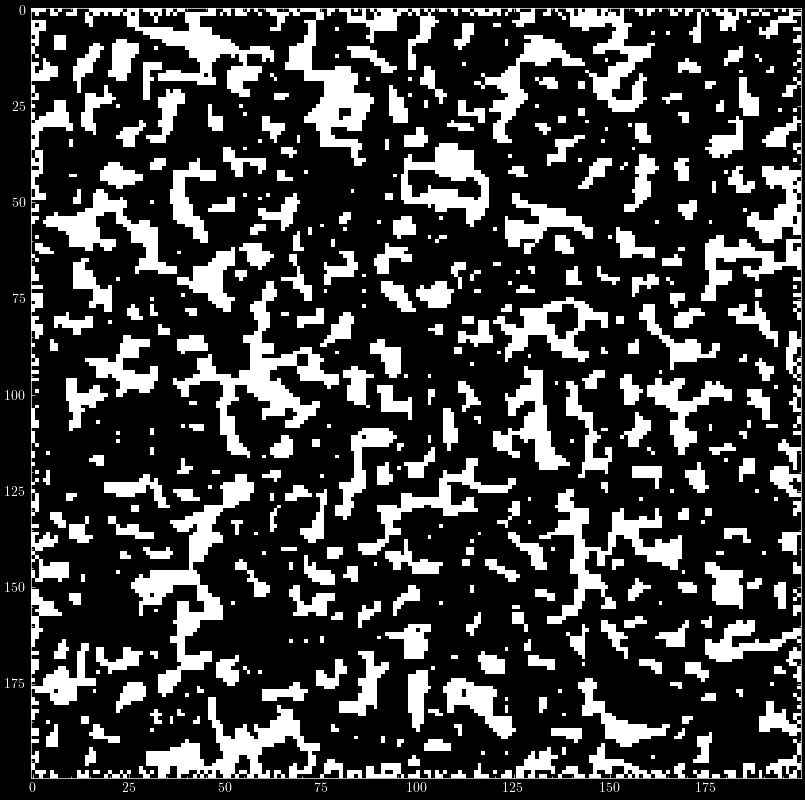

In [265]:
#plt.figure(figsize=(10, 10))
#plt.imshow(init_grid, cmap=cmapStyle)
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(updatedGrid, cmap=cmapStyle)


In [266]:
def updateGridEpochs(grid, epochs, percentage):
    storeEpochs = []
    for i in range(epochs[-1]):
        # if i in epochs: store the grid
        if i in epochs:
            storeEpochs.append(grid.copy())
        grid = update(grid, percentage)
    storeEpochs.append(grid.copy())
    return storeEpochs

In [267]:
if(1):
    ## Calculate the new grids with different temperatures and various iterations
    # repeat for different Temperatures, and with H = 0
    
    Iterations = [0,100,1000, 10000]
    #Iterations = [0,10,100, 10000]
    H = 0
    T = [1, 2.269, 5]
    NumberOfTemperatures = len(T)
    N = 200
    betaList = 1 / np.array(T)

    # init 2d array to store the grids for each temperature and 4 different iterations
    gridArray = np.zeros((NumberOfTemperatures, 4, N, N))

    for i in range(NumberOfTemperatures):
        # init the grid with equal probability [-1, +1] spins
        grid = np.random.choice([-1, 1], size=(N, N))
        init_grid = grid.copy()
        beta = betaList[i]
        
        # update the grid for each iteration
        updatedGrids = updateGridEpochs(grid, Iterations, 10)
        # store the grids
        for j in range(len(updatedGrids)):
            gridArray[i,j,:,:] = updatedGrids[j]


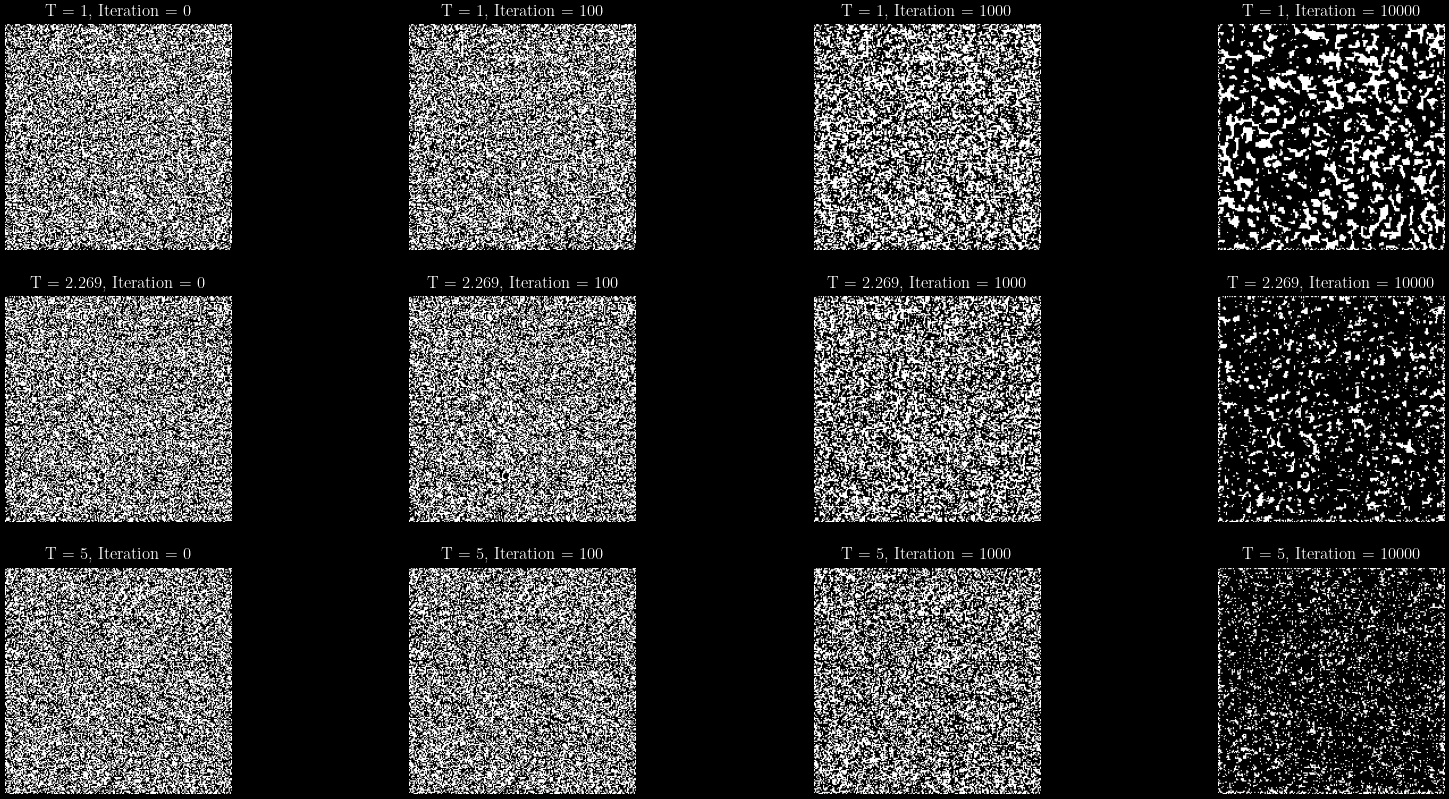

In [268]:
if(1):
    # create a subplot with 2 rows and 5 columns
    fig, axs = plt.subplots(3,4, figsize=(20, 10))

    # plot all the grids from gridArray
    for i in range(NumberOfTemperatures):
        for j in range(len(Iterations)):
            axs[i,j].imshow(gridArray[i,j,:,:], cmap=cmapStyle)
            axs[i,j].set_title("T = " + str(T[i]) + ", Iteration = " + str(Iterations[j]))
            axs[i,j].axis('off')

# C
Calculate the Expectation Value of Magnetization:

The expectation value of the magnetization can be calculated using the partition function, the Boltzmann distribution, and the magnetization.
Observe the Behavior:

Plot the expectation value of magnetization as a function of temperature.
At high temperatures, the 2D Ising model should exhibit paramagnetic behavior. This means that the average magnetization will be close to zero or very small, indicating that there is no long-range order in the spins. In a paramagnetic material, spins are randomly oriented and do not show any net magnetic moment.

to do so set
H != 0 
T > 5

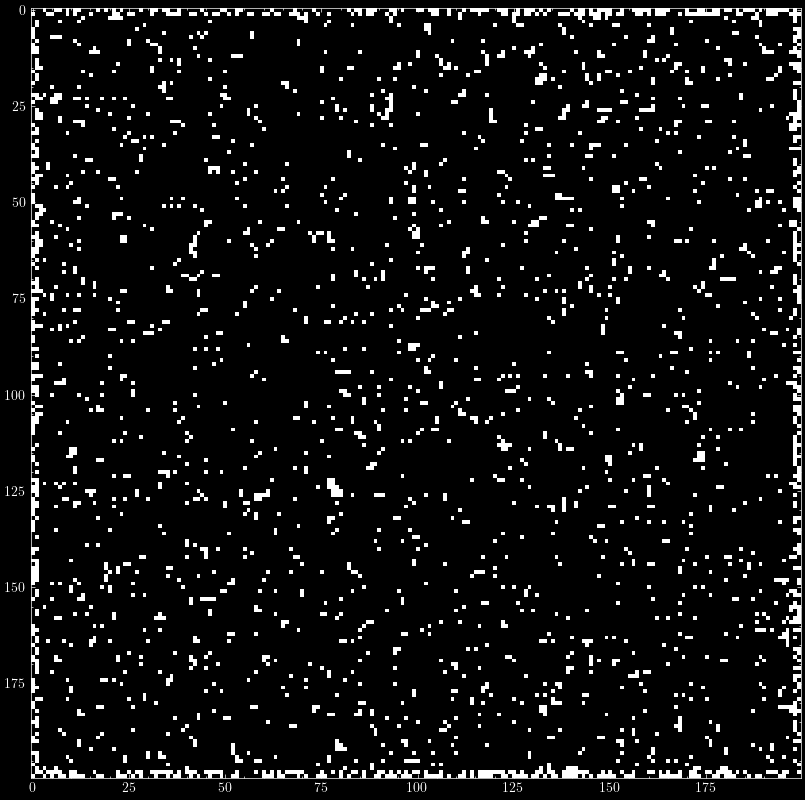

In [269]:
N = 200 # number of spins
J = 1 # feerromagnetic material
H = 1 # external magnetic field
T = 5
kB = 1
beta = 1 / T
percentage = 10

grid = initGrid(N)
updatedGrid = grid
for i in range(10000):
    updatedGrid = update(grid, percentage)
plt.figure(figsize=(10, 10))
plt.imshow(updatedGrid, cmap=cmapStyle)

It can be seen, that the distribution of the spins is not equal anymore. This is due to the field that affects them.

# D
Calculate the total magnetiation of this system as a function of H
$m = \frac{1}{N^2}\sum_{i,j}\sigma_{i,j}$

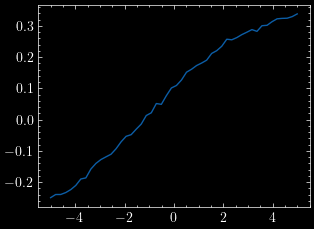

In [270]:
H_ = np.linspace(-5,5, 50)
m_h = np.zeros(len(H_))

for i in range(len(H_)):
    H = H_[i]
    grid = initGrid(N)
    updatedGrid = grid
    for j in range(1000):
        updatedGrid = update(grid, percentage)
    m_h[i] = np.sum(updatedGrid) / (N*N)

plt.plot(H_, m_h)